In [1]:
import librosa.feature
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

## Loading audio files with Librosa

In [2]:
audio_file = 'audio/debussy.wav'

In [3]:
ipd.Audio(audio_file)

In [3]:
# load audio files with librosa
signal, sr = librosa.load(audio_file)

## Extracting MFCCs

In [4]:
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)

In [6]:
mfccs.shape

(13, 1292)

## Visualising MFCCs

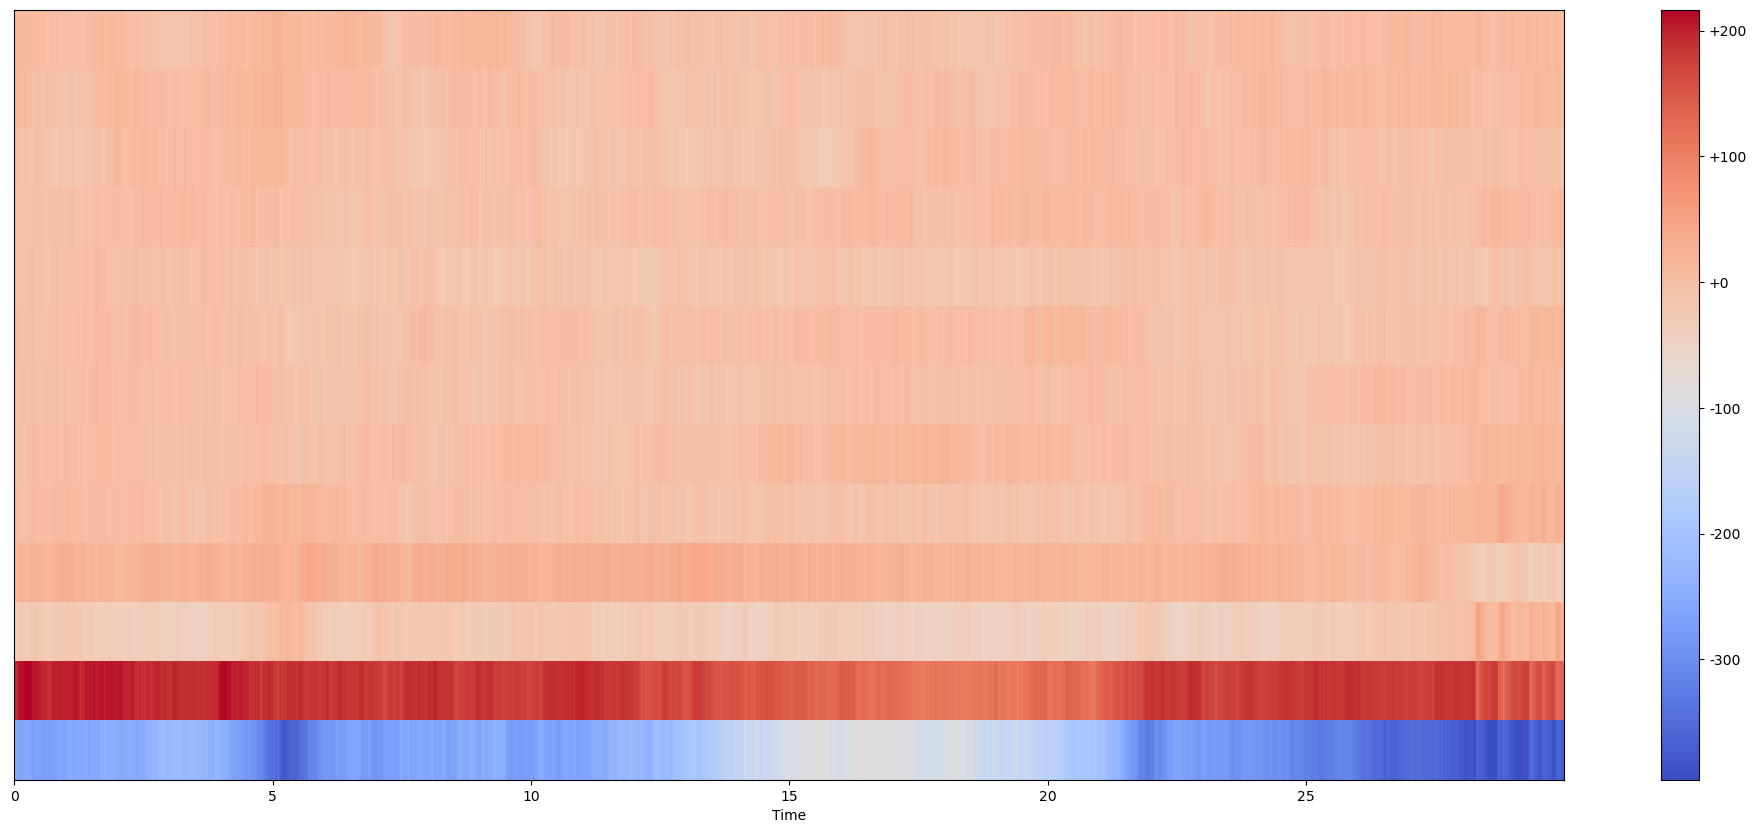

In [5]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, 
                         x_axis='time', 
                         sr=sr)
plt.colorbar(format='%+2.f')
plt.show()

## Computing first / second MFCCs derivatives

In [8]:
delta_mfccs = librosa.feature.delta(mfccs)

In [9]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [10]:
delta_mfccs.shape

(13, 1292)

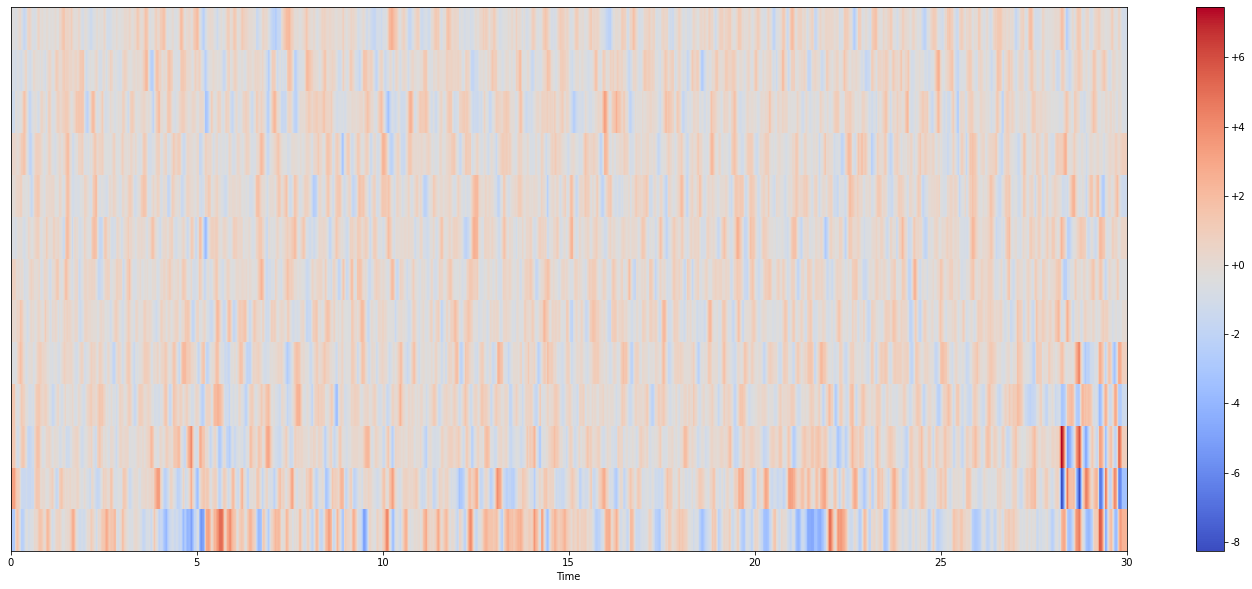

In [11]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, 
                         x_axis='time', 
                         sr=sr)
plt.colorbar(format='%+2.f')
plt.show()

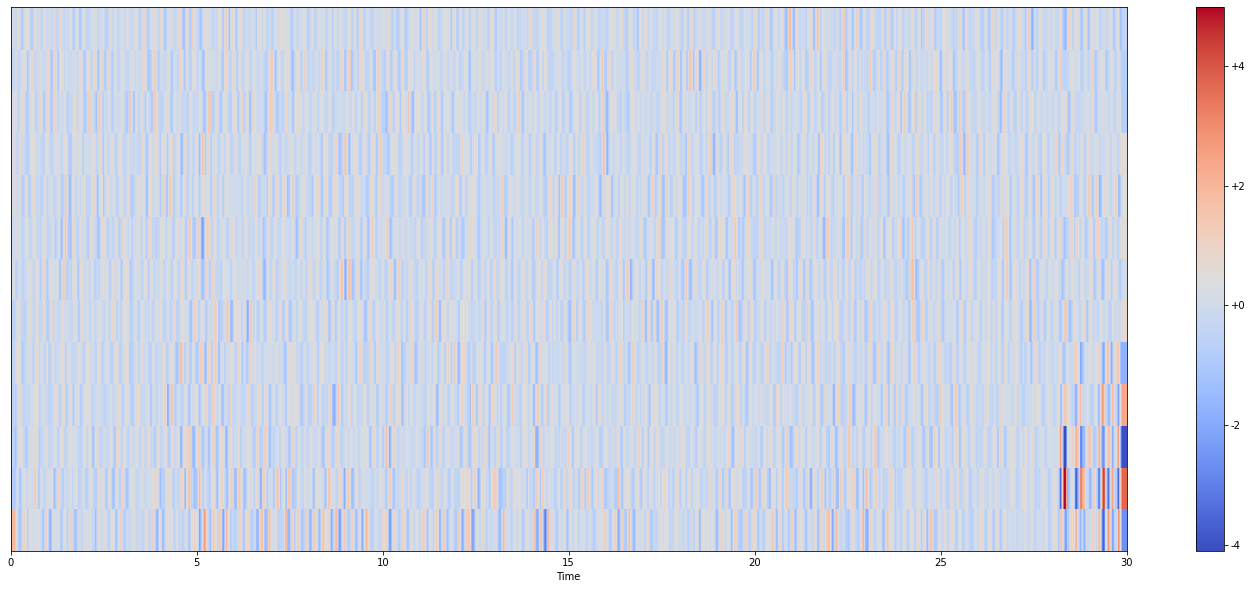

In [12]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, 
                         x_axis='time', 
                         sr=sr)
plt.colorbar(format='%+2.f')
plt.show()

In [13]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [14]:
mfccs_features.shape

(39, 1292)

## MFCCs with Torch and Torchaudio

In [6]:
import torchaudio

%matplotlib inline

In [7]:
debussy_file = 'audio/debussy.wav'

In [8]:
debussy_torchaudio, sr_torchaudio = torchaudio.load(debussy_file)

In [11]:
print(debussy_torchaudio.shape)
print(debussy_torchaudio.dim())

torch.Size([1, 661500])
2


In [9]:
# duration in seconds of 1 sample
sample_duration = 1 / sr_torchaudio
print(f'One sample lasts for {sample_duration:.8f} seconds')

One sample lasts for 0.00004535 seconds


In [10]:
# total number of samples in audio file
tot_samples = debussy_torchaudio.size(1)
print(tot_samples)

661500


In [11]:
# duration of debussy audio in seconds
duration = 1 / sr_torchaudio * tot_samples
print(f'The audio lasts for {duration} seconds')

The audio lasts for 30.0 seconds


In [12]:
FRAME_SIZE = 2048
HOP_LENGTH = 512
N_MFCC = 13

In [13]:
mfcc_transform = torchaudio.transforms.MFCC(sample_rate=sr_torchaudio, n_mfcc=N_MFCC, melkwargs={'n_fft': FRAME_SIZE, 'hop_length': HOP_LENGTH, 'mel_scale': 'slaney'})
mfccs_torchaudio = mfcc_transform(debussy_torchaudio).squeeze(0)

In [19]:
print(mfccs_torchaudio.shape)

torch.Size([13, 1292])


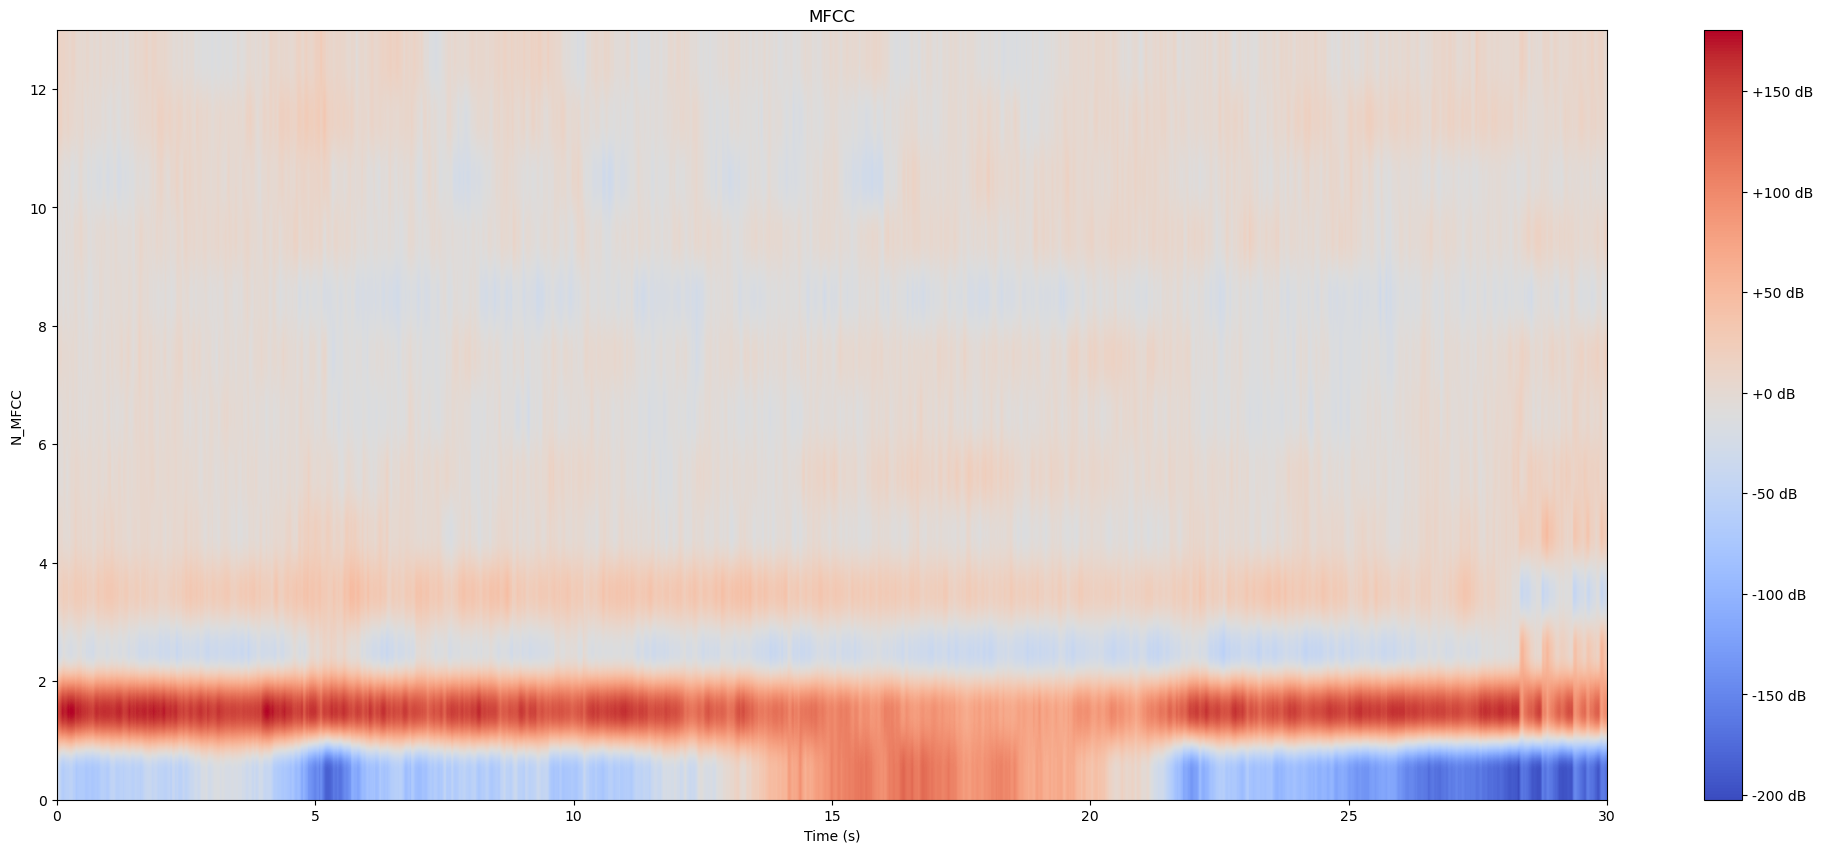

In [14]:
plt.figure(figsize=(25, 10))
plt.imshow(mfccs_torchaudio, aspect='auto', origin='lower', cmap='coolwarm', extent=(0, duration, 0, N_MFCC))
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('N_MFCC')
plt.title('MFCC')
plt.show()

In [20]:
delta_transform = torchaudio.transforms.ComputeDeltas(win_length=9)
delta_mfccs_torchaudio = delta_transform(mfccs_torchaudio)

In [21]:
delta2_mfccs_torchaudio = delta_transform(delta_mfccs_torchaudio)

In [36]:
print(delta_mfccs_torchaudio.shape)

torch.Size([13, 1292])


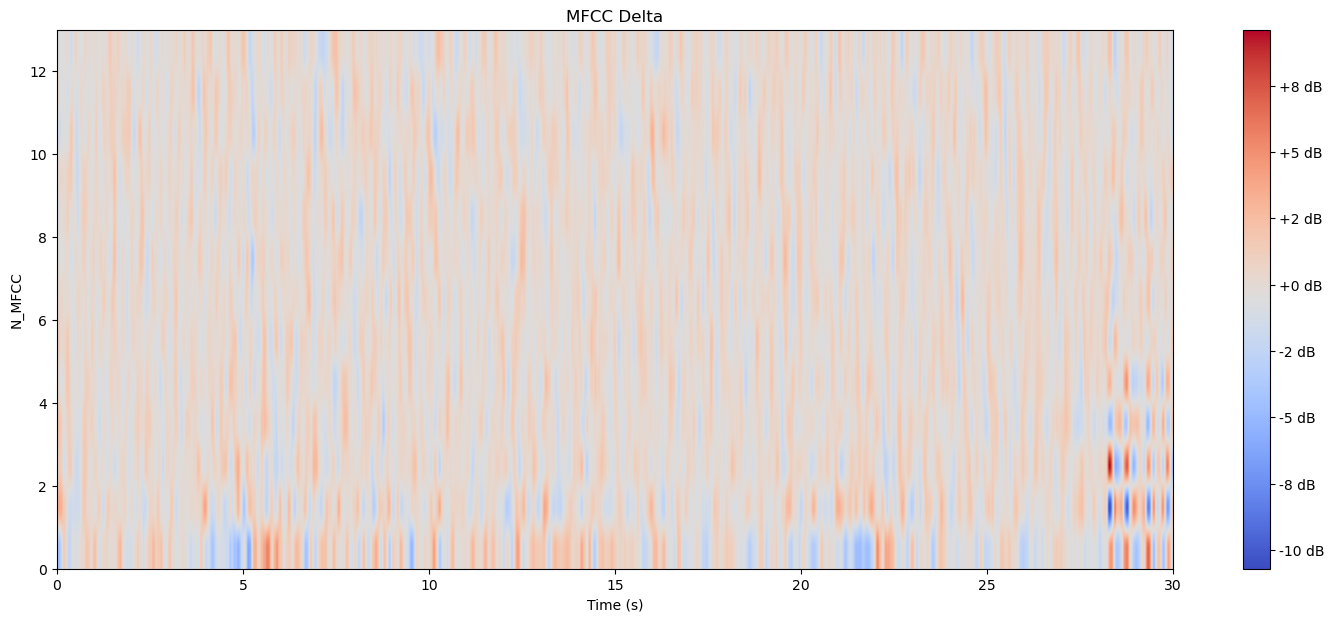

In [22]:
plt.figure(figsize=(18, 7))
plt.imshow(delta_mfccs_torchaudio, aspect='auto', origin='lower', cmap='coolwarm', extent=(0, duration, 0, 13))
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('N_MFCC')
plt.title('MFCC Delta')
plt.show()

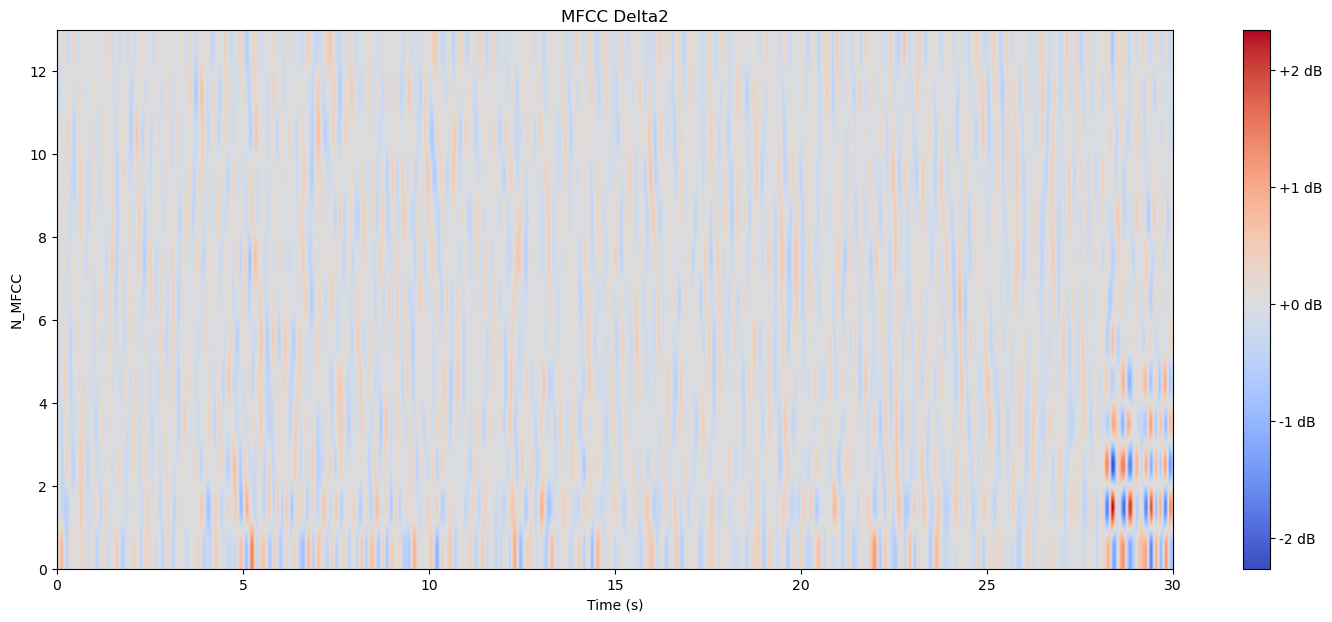

In [23]:
plt.figure(figsize=(18, 7))
plt.imshow(delta2_mfccs_torchaudio, aspect='auto', origin='lower', cmap='coolwarm', extent=(0, duration, 0, 13))
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('N_MFCC')
plt.title('MFCC Delta2')
plt.show()